# Regression Building
After freature selection, we realised that the most appropriate feature to compare with book popularity is the number of unique countries that have reviewed a book. Here we will build that regression.

We'll try modelling various different regressions (linear, logarithmic, squareroot etc.,) then select the best performing regression based on how the regression performs during a 5-fold cross validation with the evaluation metric being the mean squared error.

In [99]:
# lets first load in the relevant libraries and files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from math import sqrt, log

books_df = pd.read_csv("BX-Books-Clean.csv")

# also state that the number of cross validation folds we want to do
CV_FOLDS = 5

## Create a Training and Testing Set
We'll make our training set a to be 70% and testing set to be 30% of our entire dataset. It'll be the same training and testing set we used in Feature Selection.

In [100]:
# set a seed value so we can reproduce results
seed = 8190390

# split the DataFrame into the same training and testing sets used in feature 
# selection
train_df, test_df = train_test_split(books_df, test_size=0.3, random_state=seed)

# get the x values and y values
X_train = train_df[["Country-Freq"]]
X_test = test_df[["Country-Freq"]]
y_train = train_df["Popularity-Score"]
y_test = test_df["Popularity-Score"]

## Preliminary Assessment
Before trying to build a regression, let's observe how the training data set from out feature selection section is distributed, just to give a slight idea what kind of regression we may want to make.

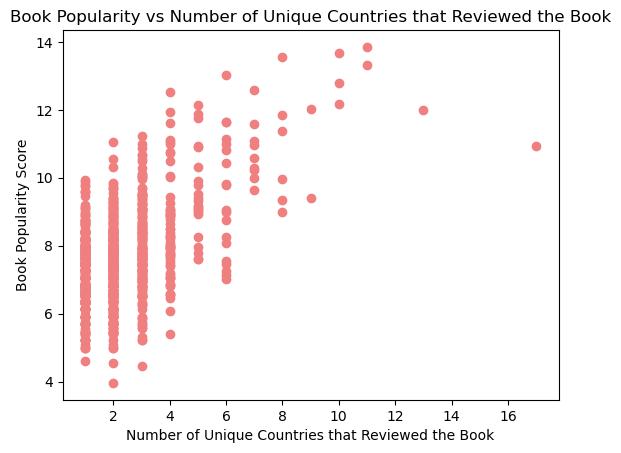

In [101]:
# now let's graph it
train_sample = train_df.sample(1000, random_state=seed)

plt.scatter(x=train_sample["Country-Freq"], y=train_sample["Popularity-Score"], 
            color='lightcoral')
plt.title("Book Popularity vs Number of Unique Countries that Reviewed the Book")
plt.xlabel("Number of Unique Countries that Reviewed the Book")
plt.ylabel("Book Popularity Score")
plt.show()
plt.close()

We see a weak positive relationship within the data. We'll try fitting a linear, quadratic, square root, logarithmic and reciprocal regression onto the data.

## Experiment with regression models
This will be the model we apply to each of our regression variations. We will construct different regressions by applying transformations to our testing data.

### Linear regression

In [102]:
# fit the linear model
lin_regression = LinearRegression()
lin_regression.fit(X_train, y_train)

# cross validate the accuracy of the model
linear_cross_val_score = cross_val_score(lin_regression, X_train, y_train, 
                                         cv=CV_FOLDS, 
                                         scoring='neg_mean_squared_error')

# analyse the mean of the mean_squared_error from each validation round
linear_mse = abs(linear_cross_val_score.mean())
print(f"The mse scores from each round of cross validation are: {abs(linear_cross_val_score)}")
print(f"The average mse from each round of cross validation is {linear_mse}")

# analyse variance of the mean_squared_error values we get
linear_var = linear_cross_val_score.var()
print(f"The total variance across the mse of each cross validation round is {linear_var}")

The mse scores from each round of cross validation are: [1.34178695 1.31934096 1.3182664  1.38783674 1.38053974]
The average mse from each round of cross validation is 1.349554159113958
The total variance across the mse of each cross validation round is 0.0008755506601526199


In [103]:
# Find the equation of the linear regression
gradient = lin_regression.coef_[0]
y_int = lin_regression.intercept_
equation = f"y = {gradient:.4f}x + {y_int:.4f}"
print(f"The equation of the linear regression is {equation}")

The equation of the linear regression is y = 0.4557x + 6.6270


### Quadratic regression

In [104]:
# transform the x values
quad_transformation = PolynomialFeatures(degree=2)
X_quad_train = quad_transformation.fit_transform(X_train)

# fit the quadratic model
quad_regression = LinearRegression()
quad_regression.fit(X_quad_train, y_train)

# cross validate the accuracy of the model
quad_cross_val_score = cross_val_score(quad_regression, X_quad_train, y_train, 
                                         cv=CV_FOLDS, 
                                         scoring='neg_mean_squared_error')

# analyse the mean of the mean_squared_error from each validation round
quad_mse = abs(quad_cross_val_score.mean())
print(f"The mse scores from each round of cross validation are: {abs(quad_cross_val_score)}")
print(f"The average mse from each round of cross validation is {quad_mse}")

# analyse variance of the mean_squared_error values we get
quad_var = quad_cross_val_score.var()
print(f"The total variance across the mse of each cross validation round "
      f"is {quad_var}")

The mse scores from each round of cross validation are: [1.3506874  1.3287142  1.32291425 1.39627137 1.65136496]
The average mse from each round of cross validation is 1.4099904336687796
The total variance across the mse of each cross validation round is 0.015230962717420748


In [121]:
# Find the equation of the quadratic regression
quad_coeffs = quad_regression.coef_
quad_y_int = quad_regression.intercept_

quad_equation = f'y = {quad_y_int:.4f}'
for i in range(1, 3):
    for j in range(X_train.shape[1]):
        quad_equation += f' + {quad_coeffs[i*X_train.shape[1] + j]:.4f}x^{i}'

print(f"The equation of the quadratic regression is {quad_equation}")

The equation of the quadratic regression is y = 6.5396 + 0.5125x^1 + -0.0055x^2


### Square root regression

In [106]:
# transform the x values
X_srqt_train = X_train.map(sqrt)

# fit the sqrt model
sqrt_regression = LinearRegression()
sqrt_regression.fit(X_srqt_train, y_train)

# cross validate the accuracy of the model
sqrt_cross_val_score = cross_val_score(sqrt_regression, X_srqt_train, y_train, 
                                         cv=CV_FOLDS, 
                                         scoring='neg_mean_squared_error')

# analyse the mean of the mean_squared_error from each validation round
sqrt_mse = abs(sqrt_cross_val_score.mean())
print(f"The mse scores from each round of cross validation are: {abs(sqrt_cross_val_score)}")
print(f"The average mse from each round of cross validation is {sqrt_mse}")

# analyse variance of the mean_squared_error values we get
sqrt_var = sqrt_cross_val_score.var()
print(f"The total variance across the mse of each cross validation round "
      f"is {sqrt_var}")

The mse scores from each round of cross validation are: [1.40490714 1.37984462 1.3727932  1.46647054 1.36672881]
The average mse from each round of cross validation is 1.3981488635971135
The total variance across the mse of each cross validation round is 0.0013357401187764737


In [107]:
# Find the equation of the sqrt regression
sqrt_gradient = sqrt_regression.coef_[0]
sqrt_y_int = sqrt_regression.intercept_
sqrt_equation = f"y = {sqrt_gradient:.4f}*sqrt(x) + {sqrt_y_int:.4f}"
print(f"The equation of the sqrt regression is {sqrt_equation}")

The equation of the sqrt regression is y = 1.5705*sqrt(x) + 5.3945


### Logarithmic regression

In [108]:
# transform the x values
X_log_train = X_train.map(log)

# fit the sqrt model
log_regression = LinearRegression()
log_regression.fit(X_log_train, y_train)

# cross validate the accuracy of the model
log_cross_val_score = cross_val_score(log_regression, X_log_train, y_train, 
                                         cv=CV_FOLDS, 
                                         scoring='neg_mean_squared_error')

# analyse the mean of the mean_squared_error from each validation round
log_mse = abs(log_cross_val_score.mean())
print(f"The mse scores from each round of cross validation are: {abs(log_cross_val_score)}")
print(f"The average mse from each round of cross validation is {log_mse}")

# analyse variance of the mean_squared_error values we get
log_var = log_cross_val_score.var()
print(f"The total variance across the mse of each cross validation round "
      f"is {log_var}")

The mse scores from each round of cross validation are: [1.49364019 1.46400448 1.4556527  1.57716858 1.44784185]
The average mse from each round of cross validation is 1.4876615605978394
The total variance across the mse of each cross validation round is 0.0022434168552748694


In [109]:
# Find the equation of the sqrt regression
log_gradient = log_regression.coef_[0]
log_y_int = log_regression.intercept_
log_equation = f"y = {log_gradient:.4f}*ln(x) + {log_y_int:.4f}"
print(f"The equation of the logarithmic regression is {log_equation}")

The equation of the logarithmic regression is y = 1.1104*ln(x) + 6.9358


### Reciprocal regression

In [110]:
def reciprocal(x):
    '''
    returns the reciprocal of a number
    '''
    return 1/x

In [111]:
# transform the x values
X_rec_train = X_train.map(reciprocal)

# fit the regression model
rec_regression = LinearRegression()
rec_regression.fit(X_rec_train, y_train)

# cross validate the accuracy of the model
rec_cross_val_score = cross_val_score(rec_regression, X_rec_train, y_train, 
                                         cv=CV_FOLDS, 
                                         scoring='neg_mean_squared_error')

# analyse the mean of the mean_squared_error from each validation round
rec_mse = abs(rec_cross_val_score.mean())
print(f"The mse scores from each round of cross validation are: {abs(rec_cross_val_score)}")
print(f"The average mse from each round of cross validation is {rec_mse}")

# analyse variance of the mean_squared_error values we get
rec_var = rec_cross_val_score.var()
print(f"The total variance across the mse of each cross validation round "
      f"is {rec_var}")

The mse scores from each round of cross validation are: [1.6400083  1.60711779 1.59114485 1.75301089 1.58936205]
The average mse from each round of cross validation is 1.636128776768042
The total variance across the mse of each cross validation round is 0.0037457595346059277


In [112]:
# Find the equation of the sqrt regression
rec_gradient = rec_regression.coef_[0]
rec_y_int = rec_regression.intercept_
rec_equation = f"y = {rec_gradient:.4f}/x + {rec_y_int:.4f}"
print(f"The equation of the reciprocal regression is {rec_equation}")

The equation of the reciprocal regression is y = -1.6211/x + 8.6342


## Final Testing
Out of all the regressions, the linear regression was the most fitting, with the lowest average MSE over the cross validations and the lowest variances between the MSE of each cross validation round. Hence, it is suggested that the linear regression is the most accurate and the most precise (repeatable) regression.

We test the evaluated linear regression on the testing data to see if its MSE is similar to the original training data.

In [113]:
# find the predicted y values for each x value in the testing set
y_pred = lin_regression.predict(X_test)

# compute the mean squared error
mse = mean_squared_error(y_pred, y_test)
print(f"The MSE of the linear regression model on the testing data is {mse}")

The MSE of the linear regression model on the testing data is 1.304055930808263


The MSE value on the testing data is even less than the average MSE obtained during cross validation, but only by 0.03432276656646982. This shows that the linear regression performs consistently with the training and testing data.

### Visualising the Regression

In [114]:
# Find the equation of the linear regression
gradient = lin_regression.coef_[0]
y_int = lin_regression.intercept_
equation = f"y = {gradient:.4f}x + {y_int:.4f}"
print(f"The equation of the linear regression is {equation}")

The equation of the linear regression is y = 0.4557x + 6.6270


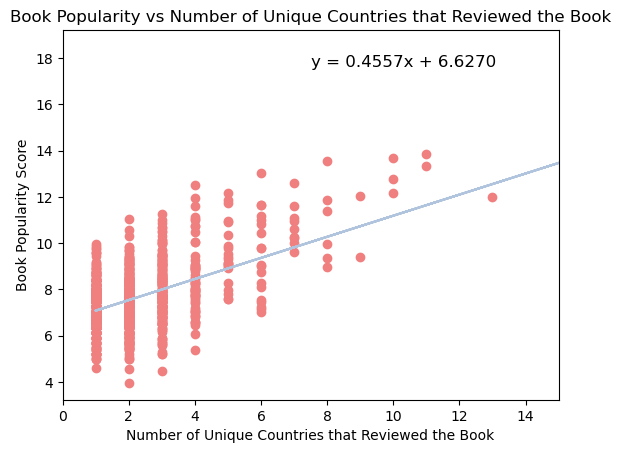

In [115]:
# plot a sample of the training data
plt.scatter(x=train_sample["Country-Freq"], y=train_sample["Popularity-Score"], 
            color='lightcoral')

# plot the linear regression
plt.plot(X_test, y_pred, color="lightsteelblue")
plt.title("Book Popularity vs Number of Unique Countries that Reviewed the Book")
plt.xlabel("Number of Unique Countries that Reviewed the Book")
plt.ylabel("Book Popularity Score")
plt.xlim(0, 15)
plt.text(0.5, 0.9, equation, fontsize=12, transform=plt.gca().transAxes)
plt.show()
plt.close()

## But wait!
There a possibility that the reason there's a relationship between the book popularity and number of unique countries to begin with is because the the book popularity is calculated based on the number of reviews a book has, and, books with more reviews are just more likely to have a larger number of unique countries reviewing them?

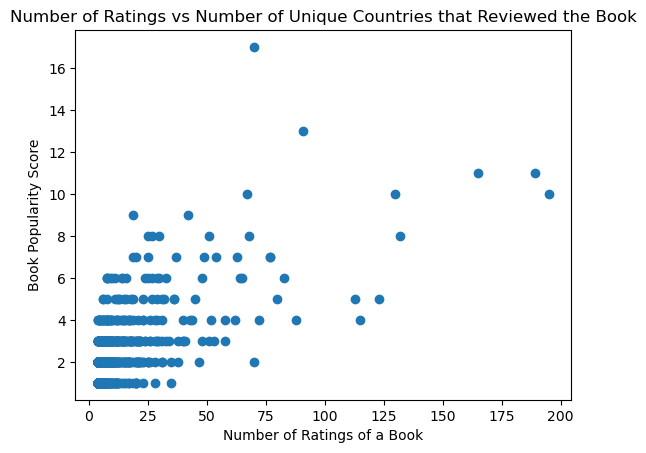

In [116]:
plt.scatter(train_sample["Num-Ratings"], train_sample["Country-Freq"])
plt.title("Number of Ratings vs Number of Unique Countries that Reviewed the Book")
plt.xlabel("Number of Ratings of a Book")
plt.ylabel("Book Popularity Score")
plt.show()
plt.close()

Yes, there's a weak positive relationship, but it doesn't seem to be anywhere near as strong as the relationship between the book popularity and country frequency. Hence, maybe having a wider spread audience really does affect how popular a book is.